# ATTACK AND ANOMALY DETECTION USING MACHINE LEARNING

### AIM
The goal of the project is to perform Attack and Anomaly detection in the IOT infrastructure with the help
of several machine learning model and to compare which model provides the best accuracy through various 
Evaluation Techniques.

### APPROACH/STEPS

We're going to take the following approach:
1. Data Collection and Dataset Analogy
2. Data Preprocessing
3. Sampling
4. Learning Algorithm
5. Generate Final Model
6. Model Evaluation


In [1]:
#Import all the tools we need 

#Regular EDA(Exploratoty Data Analysis)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#We want our plots to appear inside our notebook
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve


### TYPES OF ATTACKS 
1. DENIAL OF SERVICE (DoS): the DoS attack is caused by having too many unwanted traffic in a single source or receiver. The    attacker sends too many ambiguous packets to flood out the target and make its services unavailable to other services . In the dataset, 5780 samples are containing a DoS attack.


2. DATA TYPE PROBING(D.P): in this case, a malicious node writes different data type than intended data type . In the dataset, there are 342 samples of Data Type Probing.


3. MALICIOUS CONTROL (M.C): with software vulnerabilities sometimes the attacker can gain a valid session key or somehow capture network traffic. In this way, malicious one can control the whole system. The Dataset contains 889 samples of Malicious Control.


4. MALICIOUS OPERATION (M.O): Malicious Operations are generally caused by malware. Malware means decoy activity which distracts the original operation. Device’s performances can negatively be affected by this malicious operation .805 samples of the dataset contain Malicious Operation.


5. SCAN (SC): sometimes the data is acquired through hardware by scanning the system, and in this process sometimes the data can get corrupted. In the dataset, 1547 samples were containing Scan.


6. SPYING (SP): by Spying, the attacker exploits the vulnerabilities of the system, and they use a backdoor channel to break into the system and discovers important information. In some cases, they manipulate data causing great hamper to the whole system. The dataset contains 532 samples of Spying.


7. WRONG SETUP (W.S): the data may also get disrupted by the wrong system setup . The dataset contains 122 samples of the Wrong Setup.


8. NORMAL (NL): if the data is entirely correct and accurate, then the data is called normal data. Out of the 357,952 samples, 347,935 samples are of a normal class.

In [2]:
#Load data and check
iot_sensors = pd.read_csv("iotsensor.csv")
iot_sensors.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal


### FEATURES :
    
1.  Source ID
2.  Source Address
3.  Source Type
4.  Source Location
5.  Destination Service Address
6.  Destination Service Type
7.  Destination Location
8.  Accessed Node Address
9.  Accessed Node Type
10. Operation
11. Value
12. Timestamp
13. Normality

# Data Exploration  (Exploratory Data Analysis or EDA)
Thr goal here is to find out more about the data and become a subject matter expert on the dataset we are working with .

1. What questions are we trying to solve ?
2. What kind of data do we have and how do we treat different types ?
3. What's missing from the data and how do we deal with it ?
4. What are the outliers and why we should care about them ?
5. How can we add,change or remove features to get more out of our data ?

In [3]:
iot_sensors.head()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
0,lightcontrol2,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,BedroomParents,/agent2/lightcontrol2,/lightControler,registerService,none,1520031600000,normal
1,lightcontrol3,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,Dinningroom,/agent3/lightcontrol3,/lightControler,registerService,none,1520031603269,normal
2,lightcontrol1,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,BedroomChildren,/agent1/lightcontrol1,/lightControler,registerService,none,1520031603279,normal
3,lightcontrol4,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,Kitchen,/agent4/lightcontrol4,/lightControler,registerService,none,1520031603290,normal
4,movement4,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,Kitchen,/agent4/movement4,/movementSensor,registerService,none,1520031603464,normal


In [4]:
iot_sensors.tail()

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,timestamp,normality
357947,lightcontrol23,/agent23/lightcontrol23,/lightControler,room_4,/agent23/tempin23,/sensorService,room_4,/agent23/tempin23,/sensorService,read,20.3479,1520117997001,normal
357948,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charge,/basic/number,read,9,1520117997339,normal
357949,washingmachine2,/agent11/washingmachine2,/washingService,Watterroom,/agent11/battery4,/batteryService,Watterroom,/agent11/battery4/charging,/basic/text,read,true,1520117997401,normal
357950,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/movement28,/movementSensor,room_9,/agent28/movement28/movement,/derived/boolean,read,0,1520117998907,normal
357951,lightcontrol28,/agent28/lightcontrol28,/lightControler,room_9,/agent28/tempin28,/sensorService,room_9,/agent28/tempin28,/sensorService,read,20.4131,1520117999000,normal


In [5]:
iot_sensors.shape # We have around 357,953 Rows and 13 columns/Features 

(357952, 13)

In [6]:
#Let's check how many of each classes are there
iot_sensors["normality"].value_counts()

normal                           347935
anomalous(DoSattack)               5780
anomalous(scan)                    1547
anomalous(malitiousControl)         889
anomalous(malitiousOperation)       805
anomalous(spying)                   532
anomalous(dataProbing)              342
anomalous(wrongSetUp)               122
Name: normality, dtype: int64

In [7]:
#We observe that its basically a Multi-Class dataset , since it consists of 8 different classes of attacks faced in 
#IOT infrastructure

In [8]:
iot_sensors.dtypes

sourceID                     object
sourceAddress                object
sourceType                   object
sourceLocation               object
destinationServiceAddress    object
destinationServiceType       object
destinationLocation          object
accessedNodeAddress          object
accessedNodeType             object
operation                    object
value                        object
timestamp                     int64
normality                    object
dtype: object

In [9]:
#Check missing values
iot_sensors.isna().sum()

sourceID                        0
sourceAddress                   0
sourceType                      0
sourceLocation                  0
destinationServiceAddress       0
destinationServiceType          0
destinationLocation             0
accessedNodeAddress             0
accessedNodeType              148
operation                       0
value                        2050
timestamp                       0
normality                       0
dtype: int64

In [10]:
#This is to check how many unique values exists within a feature variable
iot_sensors.nunique()

sourceID                         84
sourceAddress                    89
sourceType                        8
sourceLocation                   21
destinationServiceAddress        85
destinationServiceType            8
destinationLocation              21
accessedNodeAddress             170
accessedNodeType                 12
operation                         5
value                         10623
timestamp                    327811
normality                         8
dtype: int64

In [11]:
#We replaced certain values and added missing values
iot_sensors["value"] = iot_sensors["value"].replace(["false","true","twenty","none"],["0.0","1.0","20.0","0.0"])
iot_sensors["value"].fillna("0.0",inplace=True)
iot_sensors["accessedNodeType"].fillna("malicious",inplace=True)
iot_sensors['value'] = iot_sensors['value'].astype(str)

In [12]:
#To find how many uniques/distinct values exist within the features
iot_sensors.nunique()

sourceID                         84
sourceAddress                    89
sourceType                        8
sourceLocation                   21
destinationServiceAddress        85
destinationServiceType            8
destinationLocation              21
accessedNodeAddress             170
accessedNodeType                 13
operation                         5
value                         10621
timestamp                    327811
normality                         8
dtype: int64

In [13]:
iot_sensors.isna().sum()

sourceID                     0
sourceAddress                0
sourceType                   0
sourceLocation               0
destinationServiceAddress    0
destinationServiceType       0
destinationLocation          0
accessedNodeAddress          0
accessedNodeType             0
operation                    0
value                        0
timestamp                    0
normality                    0
dtype: int64

In [14]:
#Convert categorical variables to vectors/convert object data type to floating number with the help of Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
iot_sensors2 = iot_sensors.apply(LabelEncoder().fit_transform)

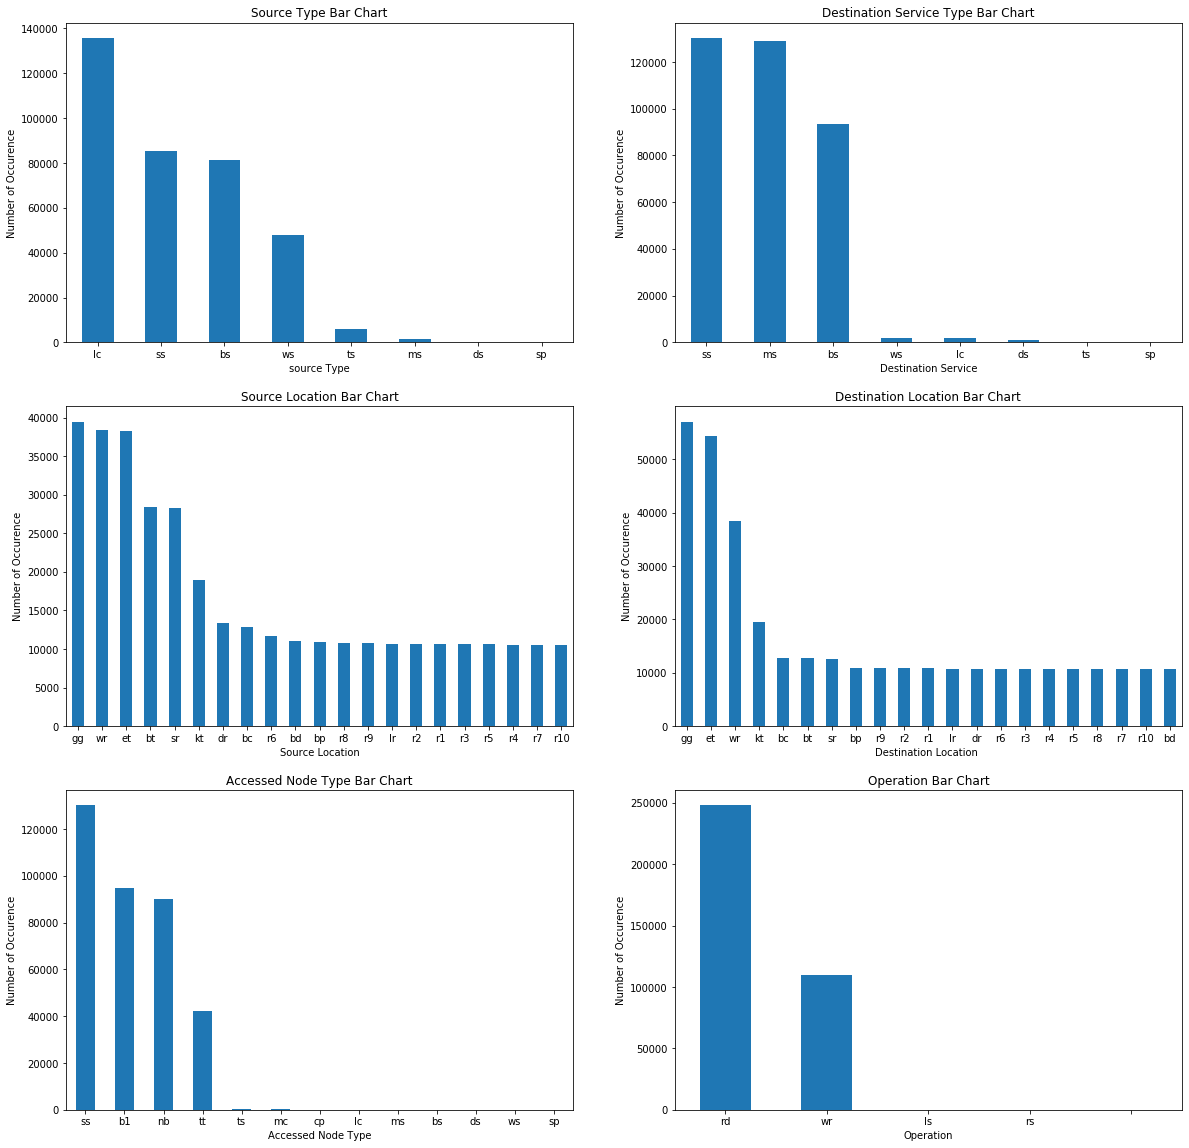

In [16]:
#BAR CHART REPRESENTATION OF FEATURES WITH  SMALL MULTIPLE CLASSES

# Frequencies of (a) Source Type (b) Destination Type (c) Source Location (d) Destination Location (e) Accessed Node
# (f) Operation

# 'lc' = Light Controller, 'ss' = Sensor Service, 'bs' = Battery Service, 'ws' = Washing Service,'ts' = Thermostat,
# 'ms' = Movement Sensor, 'ds' = Door Lock Service, 'sp' = Smart Phone, 'gg' = Garage, 'bp' = Bedroom Parents,'et' = Entrance, 
# 'lr' = Living Room, 'sr' = Showerroom, 'kt' = Kitchen, 'dr' = Dining Room, 'wr' = Water Room, 'bd' = Bedroom, 'bt' = Bathroom, 
# 'bc' = Bedroom Children, 'r1–r10' = room1 to room10, 'tt' = Text, 'nb' = Number, 'bl' = Boolean, 'mc' = Malicious, 'cp' = Composed,
# 'rd' = Read, 'rs' = Register Service, 'wr' = Write, 'ls' = Lock Sub Tree].

fig,((ax00,ax01),
     (ax10,ax11),
     (ax20,ax21)) = plt.subplots(3, 2, figsize=(20, 20))

iot_sensors2['sourceType'].value_counts().plot(kind="bar",ax=ax00)
labels = ['lc', 'ss', 'bs', 'ws', 'ts','ms','ds','sp']
ax00.set_xticklabels(labels, rotation=0)
ax00.set(title="Source Type Bar Chart",xlabel="source Type",ylabel = "Number of Occurence")

iot_sensors2['destinationServiceType'].value_counts().plot(kind="bar",ax=ax01)
labels = ['ss', 'ms', 'bs', 'ws', 'lc','ds','ts','sp']
ax01.set_xticklabels(labels, rotation=0)
ax01.set(title="Destination Service Type Bar Chart",xlabel="Destination Service",ylabel = "Number of Occurence")

iot_sensors2['sourceLocation'].value_counts().plot(kind="bar",ax=ax10)
labels = ['gg', 'wr', 'et', 'bt', 'sr','kt','dr','bc','r6','bd','bp','r8','r9','lr','r2','r1','r3','r5','r4','r7','r10']
ax10.set_xticklabels(labels, rotation=0)
ax10.set(title="Source Location Bar Chart",xlabel="Source Location",ylabel = "Number of Occurence")

iot_sensors2['destinationLocation'].value_counts().plot(kind="bar",ax=ax11)
labels = ['gg', 'et', 'wr', 'kt', 'bc','bt','sr','bp','r9','r2','r1','lr','dr','r6','r3','r4','r5','r8','r7','r10','bd']
ax11.set_xticklabels(labels, rotation=0)
ax11.set(title="Destination Location Bar Chart",xlabel="Destination Location ",ylabel = "Number of Occurence")

iot_sensors2['accessedNodeType'].value_counts().plot(kind="bar",ax=ax20)
labels = ['ss', 'b1', 'nb', 'tt', 'ts','mc','cp','lc','ms','bs','ds','ws','sp']
ax20.set_xticklabels(labels, rotation=0)
ax20.set(title="Accessed Node Type Bar Chart",xlabel="Accessed Node Type",ylabel = "Number of Occurence")

iot_sensors2['operation'].value_counts().plot(kind="bar",ax=ax21)
labels = ['rd', 'wr', 'ls', 'rs']
ax21.set_xticklabels(labels, rotation=0)
ax21.set(title="Operation Bar Chart",xlabel="Operation",ylabel = "Number of Occurence");

### FEATURE SELECTION TECHNIQUES

### 1) Univariate Selection
Statistical test can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suit of different statistical tests to select a specific number of features.

The example below uses the chi-squared statistical test for non-negative features to select 10 of the best features from Risk analysis dataset.

In [17]:
#UNIVARIATE SELECTION

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = iot_sensors2.drop("normality",axis=1)
y = iot_sensors2["normality"]

#apply SelectKBest classto extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Specs","Score"]#naming the dataframe columns
featureScores

,Specs,Score
0,sourceID,1.367482e+05
1,sourceAddress,4.536705e+04
2,sourceType,9.977383e+03
3,sourceLocation,2.472473e+04
4,destinationServiceAddress,2.647577e+04
5,destinationServiceType,1.411998e+04
6,destinationLocation,2.451364e+04
7,accessedNodeAddress,5.005573e+04
8,accessedNodeType,3.184123e+03
9,operation,6.459718e+03


In [18]:
print(featureScores.nlargest(10,'Score')) #print 10 best features

                        Specs         Score
11                  timestamp  1.255168e+08
10                      value  1.841966e+07
0                    sourceID  1.367482e+05
7         accessedNodeAddress  5.005573e+04
1               sourceAddress  4.536705e+04
4   destinationServiceAddress  2.647577e+04
3              sourceLocation  2.472473e+04
6         destinationLocation  2.451364e+04
5      destinationServiceType  1.411998e+04
2                  sourceType  9.977383e+03


### 2) Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature Importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with tree based classifiers, we will be using extra tree classifiers for extracting the top 10 features for the dataset.

[0.10493749 0.05443622 0.14518489 0.06376385 0.0515633  0.15586134
 0.0573655  0.04570624 0.08426793 0.05926391 0.05530431 0.12234502]


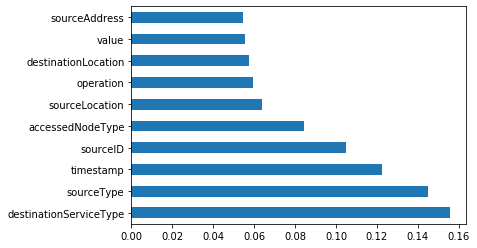

In [19]:
#FEATURE IMPORTANCE TECHNIQUE

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators = 100)
model.fit(X,y)
print(model.feature_importances_)#use  inbuilt class feature_importance of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

### 3) Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable

Correlation can be positive(increase in one value of feature increases the vlaue of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable ,we will plot heatmap of correlated features using the seaborn library.


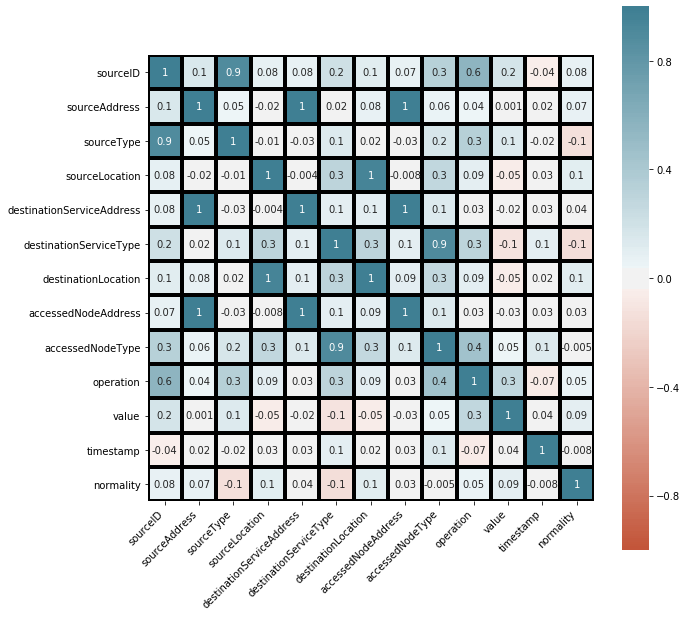

In [20]:
#CORRELATION MATRIX : CHECKING OF MULTI-COLLINEARITY

corr = iot_sensors2.corr()
fig,ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    annot = True,
    fmt='.1g',
    vmin=-1, vmax=1, center=0,
    linewidths=3,
    linecolor='black',
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# MODELLING THE DATA

In [21]:
#GETTING THE DATA READY

#X = predictor variables
#y = target variable

X = iot_sensors2.drop("normality",axis=1)
y = iot_sensors2["normality"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Alternative Method
This method is used to give accuracy scores of each model by running them all together but since it was taking too much
time to run,I used each model seperately in later steps and skipped it for now .

In [22]:
# we will try 4 different classification models
#create a dicionary "models"
#models = {
#    "LogisticRegression":LogisticRegression(),
#    "KNeighborsClassifier":KNeighborsClassifier(),
#    "DecisionTreeClassifier":DecisionTreeClassifier(),
#    "RandomForestClassifier":RandomForestClassifier()}

#create a user-defined functions
#def fit_and_score(models,X_train,X_test,y_train,y_test):
#    model_scores = {}
#    for name,model in models.items():
#        model.fit(X_train,y_train)
#        model_scores[name]=model.score(X_test,y_test)
#    return model_scores
        
    

In [23]:
#model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
#model_scores

# CLASSIFICATION MODELS :

## LOGISTIC REGRESSION

In [24]:
np.random.seed(0)
lr = LogisticRegression()
lr.fit(X_train,y_train)

In [25]:
y_preds = lr.predict(X_test)
y_preds

In [26]:
accur_table = accuracy_score(y_test,y_preds)
accur_table

In [27]:
clr = classification_report(y_test,y_preds)
print(clr)

In [28]:
cm = confusion_matrix(y_test,y_preds)
cm

## MULTICLASS ROC CURVE FOR LOGISTIC REGRESSION

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
X = iot_sensors2.drop("normality",axis=1)
y = iot_sensors2["normality"]

# Binarize the output
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(42)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Learn to predict each class against the other
lr2=LogisticRegression()
classifier = OneVsRestClassifier(lr2)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [30]:
#CROSS VALIDATED ACCURACY SCORE

lr_acc = cross_val_score(lr,X,y,cv=5,scoring="accuracy")
lr_acc


### VISUALISATION OF LOGISTIC REGRESSION MODEL WITH THE HELP OF LEARNING CURVE USING CROSS VALIDATION METHOD

In [31]:

X = iot_sensors2.drop("normality",axis=1)
y = iot_sensors2["normality"]

from sklearn.model_selection import learning_curve
def plot_curve():
    # instantiate
    lr3 = LogisticRegression()

    # fit
    lr3.fit(X, y)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    train_sizes, train_scores, test_scores = learning_curve(lr3, X, y, n_jobs=-1, cv=5, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Logistic Regression")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()

plot_curve()

# KNEIGHBORS CLASSIFIER

In [32]:
#Fitting the model
np.random.seed(42)
kc = KNeighborsClassifier()
kc.fit(X_train,y_train)

In [33]:
#Predicting the model
y_preds1 = kc.predict(X_test)
y_preds1

In [34]:
#Predicting the accuracy
accur_table1 = accuracy_score(y_test,y_preds1)
accur_table1

In [35]:
#classification report
clr1 = classification_report(y_test,y_preds1)
print(clr1)

In [36]:
#confusion matrix
cm1 = confusion_matrix(y_test,y_preds1)
cm1

# MULTICLASS ROC CURVE FOR KNEIGHBORS CLASSIFIER

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
X = iot_sensors2.drop("normality",axis=1)
y = iot_sensors2["normality"]

# Binarize the output
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(42)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Learn to predict each class against the other
kc2=KNeighborsClassifier()
classifier = OneVsRestClassifier(kc2)
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### LEARNING CURVE OF KNEIGHBORS CLASSIFICATION  MODEL 

In [38]:
from sklearn.model_selection import learning_curve
def plot_curve():
    
    np.random.seed(0)
    X = iot_sensors2.drop("normality",axis=1)
    y = iot_sensors2["normality"]
    # instantiate

    kc3 = KNeighborsClassifier()
    
    train_sizes = [57270,114540,171810,229080,286350]
    train_sizes, train_scores, test_scores = learning_curve(kc3, X, y, cv=5, train_sizes=train_sizes,scoring = "accuracy", verbose=0)

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = train_scores.std(axis=1)
    
    plt.figure()
    plt.title("KNeighborsClassifier")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()
    
    #plot the std deviation as a transparent range at each training set size
    #plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    #plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.xlim(55000,300000)
    plt.ylim(-0.1,1.1)
    plt.show()

plot_curve()

### OBSERVATION
WE OBSERVE THAT WITHIN THE VISUALIZATION FOR KNEIGHBORS ABOVE, OUR MODEL IS TRAINING THE MODEL VERY WELL AND GIVING HIGH 
ACCURACY BUT WHEN IT COMES TO TESTING VALIDATION,THE ACCURACY DECREASES WHICH MAKES IT A CLASSIC CASE OF OVERFITTING.
THUS TO REDUCE THE OVERFITTING HERE WE WILL REDUCE THE NUMBER OF FEATURE VARIABLE WHICH DOES NOT CONTRIBUTE IN THE 
ATTACK PREDICTION. WITH THE HELP OF MULTICOLLINEARITY HEAT MAP WE OBSERVE THAT TIMESTAMP HAS A LOW VALUE OF 
COLLINEARITY IN RELATION TO THE OUTPUT VARIABLE. THUS WE WILL ELMINATE TIMESTAMP AND VISUALIZE IT AGAIN.

In [ ]:
from sklearn.model_selection import learning_curve
def plot_curve():
    
    np.random.seed(0)
    X2 = iot_sensors2[["sourceID","sourceAddress","sourceType","sourceLocation","destinationServiceAddress","destinationServiceType","destinationLocation","accessedNodeType","accessedNodeAddress","operation","value"]]
    y = iot_sensors2["normality"]
    
    # instantiate
    kc3 = KNeighborsClassifier()

    train_sizes = [57270,114540,171810,229080,286350]
    train_sizes, train_scores, test_scores = learning_curve(kc3, X2, y, cv=5, train_sizes=train_sizes,scoring = "accuracy", verbose=0)

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = train_scores.std(axis=1)
    
    plt.figure()
    plt.title("KNeighborsClassifier")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.xlim(55000,300000)
    plt.ylim(-0.1,1.1)
    plt.show()

plot_curve()

## SOLVED:
WE OBSERVE ABOVE THAT BY ELIMINATING TIMESTAMP FROM OUR MODEL THE ACCURACY OF TEST CROSS VALIDATION SIGNIFICANTLY INCREASES
AND THUS OVERFITTING IS SOLVED.

# RANDOM FOREST CLASSIFIER

In [41]:
#Fitting Random Forest Classifier
np.random.seed(42)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

In [42]:
#predicting through Random Forest
y_preds2 = rfc.predict(X_test)
y_preds2

In [43]:
#Accuracy Score
accur_table2 = accuracy_score(y_test,y_preds2)
accur_table2

In [44]:
#Classification Report
clr2 = classification_report(y_test,y_preds2)
print(clr2)

In [45]:
#Confusion Matrix
cm2 = confusion_matrix(y_test,y_preds2)
cm2

## ROC CURVE FOR RANDOM FOREST CLASSIFIER

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
X = iot_sensors2.drop("normality",axis=1)
y = iot_sensors2["normality"]

# Binarize the output
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(42)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Learn to predict each class against the other
rfc2 = RandomForestClassifier()
classifier = OneVsRestClassifier(rfc2)
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## LEARNING CURVE OF RANDOM FOREST CLASSIFIER

In [47]:

from sklearn.model_selection import learning_curve
def plot_curve():
    
    np.random.seed(0)
    X = iot_sensors2.drop("normality",axis=1)
    y = iot_sensors2["normality"]
    # instantiate
    rfc3 = RandomForestClassifier(random_state=0,n_estimators=100)
    
    train_sizes = [57270,114540,171810,229080,286350]
    train_sizes, train_scores, test_scores = learning_curve(rfc3, X, y, cv=5, train_sizes=train_sizes,scoring = "accuracy", verbose=0)

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = train_scores.std(axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.xlim(55000,300000)
    plt.ylim(-0.1,1.1)
    plt.show()

plot_curve()

### OBSERVATION 2 :
WE AGAIN OBSERVE OVERFITTING OF THE MODEL BUT THIS TIME WE WILL TRY TWO DIFFERENT WAYS TO COMPARE ACCURACY 
1. WE WILL REMOVE BOTH ACCESSEDNODETYPE AND TIMESTAMP
2. WE WILL REMOVE ONLY TIMESTAMP

THE REASON FOR TRYING THESE TWO DIFFERENT WAYS IS BECAUSE AS PER THE HEATMAP OF MULTICOLLINEARITY THESE TWO
FEATURE VARIABLE HAS A VALUE OF -0.005 AND -0.008 RESPECTIVELY THUS SHOWING LEAST DEPENDENCY.

## WAY 1- ELIMINATING BOTH ACCESSEDNODETYPE AND TIMESTAMP

In [ ]:
data = iot_sensors2[["sourceID","sourceAddress","sourceType","sourceLocation","destinationServiceAddress","destinationServiceType","destinationLocation","accessedNodeAddress","operation","value"]]
data.head()

In [ ]:
x1 = data

In [ ]:
#Fitting Random Forest Classifier
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2)
np.random.seed(42)
rfc5 = RandomForestClassifier()
rfc5.fit(X_train,y_train)

In [ ]:
# predicting through Random Forest
y_preds5 = rfc5.predict(X_test)
y_preds5

In [ ]:
#Accuracy Score
accur_table5 = accuracy_score(y_test,y_preds5)
accur_table5

In [ ]:
#Classification Report
clr5 = classification_report(y_test,y_preds5)
print(clr5)

### ROC CURVE FOR WAY 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
X2 = iot_sensors2[["sourceID","sourceAddress","sourceType","sourceLocation","destinationServiceAddress","destinationServiceType","destinationLocation","accessedNodeAddress","operation","value"]]
y = iot_sensors2["normality"]

# Binarize the output
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X2.shape
X2= np.c_[X2, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2,
                                                    random_state=0)

# Learn to predict each class against the other
rfc6 = RandomForestClassifier()
classifier = OneVsRestClassifier(rfc6)
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

### LEARNING CURVE FOR WAY 1

In [ ]:
from sklearn.model_selection import learning_curve
def plot_curve():
    
    np.random.seed(0)
    X2 = iot_sensors2[["sourceID","sourceAddress","sourceType","sourceLocation","destinationServiceAddress","destinationServiceType","destinationLocation","accessedNodeAddress","operation","value"]]
    y = iot_sensors2["normality"]
    # instantiate

    rfc5 = RandomForestClassifier(random_state=0)

    train_sizes = [57270,114540,171810,229080,286350]
    train_sizes, train_scores, test_scores = learning_curve(rfc5, X2, y, cv=5, train_sizes=train_sizes,scoring = "accuracy", verbose=0)

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = train_scores.std(axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()
      
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.xlim(55000,300000)
    plt.ylim(-0.1,1.1)
    plt.show()

plot_curve()

## WAY 2- ELIMINATING ONLY TIMESTAMP

## ROC CURVE FOR WAY 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
X3 = iot_sensors2[["sourceID","sourceAddress","sourceType","sourceLocation","destinationServiceAddress","destinationServiceType","destinationLocation","accessedNodeType","accessedNodeAddress","operation","value"]]
y = iot_sensors2["normality"]

# Binarize the output
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X3.shape
X3= np.c_[X3, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2,
                                                    random_state=0)

# Learn to predict each class against the other
rfc6 = RandomForestClassifier()
classifier = OneVsRestClassifier(rfc6)
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## LEARNING CURVE FOR WAY 2

In [ ]:
from sklearn.model_selection import learning_curve
def plot_curve():
    
    np.random.seed(0)
    X2 = iot_sensors2[["sourceID","sourceAddress","sourceType","sourceLocation","destinationServiceAddress","destinationServiceType","destinationLocation","accessedNodeType","accessedNodeAddress","operation","value"]]
    y = iot_sensors2["normality"]
    # instantiate

    rfc5 = RandomForestClassifier(random_state=0)

    train_sizes = [57270,114540,171810,229080,286350]
    train_sizes, train_scores, test_scores = learning_curve(rfc5, X2, y, cv=5, train_sizes=train_sizes,scoring = "accuracy", verbose=0)

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = train_scores.std(axis=1)
    
    plt.figure()
    plt.title("RandomForestClassifier")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.xlim(55000,300000)
    plt.ylim(-0.1,1.1)
    plt.show()

plot_curve()

## OBSERVATION 3:
WE OBSERVE ABOVE THAT FOR BOTH WAY 1 AND WAY 2 WE WERE ABLE TO FIX OVERFITTING OF THE MODEL , BUT  WAY 2 GIVES A BETTER PREDICTION AS COMPARED TO WAY 1 , THEREFORE , WE WE ONLY ELIMINATE TIMESTAMP FROM FEATURE VARIABLE.

# DECISION TREE CLASSIFIER

In [50]:
#Fitting Decision Tree Classifier
np.random.seed(42)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

In [51]:
# predicting through Decision Tree Classifier
y_preds3 = dtc.predict(X_test)
y_preds3

In [52]:
#Accuracy Score
accur_table3 = accuracy_score(y_test,y_preds3)
accur_table3

In [53]:
#Classification Report
clr3 = classification_report(y_test,y_preds3)
print(clr3)

In [54]:
#Confusion Matrix
cm3 = confusion_matrix(y_test,y_preds3)
cm3

## ROC CURVE FOR DECISION TREE CLASSIFIER 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Import some data to play with
X = iot_sensors2.drop("normality",axis=1)
y = iot_sensors2["normality"]

# Binarize the output
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(42)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Learn to predict each class against the other
dtc2 = DecisionTreeClassifier()
classifier = OneVsRestClassifier(dtc2)
y_score = classifier.fit(X_train, y_train).predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## LEARNING CURVE FOR DECISION TREE CLASSIFIER

In [1]:
from sklearn.model_selection import learning_curve
def plot_curve():
    
    np.random.seed(0)
    X = iot_sensors2.drop("normality",axis=1)
    y = iot_sensors2["normality"]
    # instantiate

    dtc3 = DecisionTreeClassifier(random_state=0)
    
    train_sizes = [57270,114540,171810,229080,286350]
    train_sizes, train_scores, test_scores = learning_curve(dtc3, X, y, cv=5, train_sizes=train_sizes,scoring = "accuracy", verbose=0)

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = train_scores.std(axis=1)
    
    plt.figure()
    plt.title("DecisionTreeClassifier")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.xlim(55000,300000)
    plt.ylim(-0.1,1.1)
    plt.show()

plot_curve()

### OBSERVATION 4: 
WE AGAIN OBSERVE OVERFITTING OF THE MODEL AND THUS ELIMINATE TIMESTAMP FEATURE VARIABLE AND SOLVE THE OVERFITTING.

In [57]:
from sklearn.model_selection import learning_curve
def plot_curve():
    
    np.random.seed(0)
    X2 = iot_sensors2[["sourceID","sourceAddress","sourceType","sourceLocation","destinationServiceAddress","destinationServiceType","destinationLocation","accessedNodeType","accessedNodeAddress","operation","value"]]
    y = iot_sensors2["normality"]
    # instantiate

    dtc3 = DecisionTreeClassifier(random_state=0)
    
    train_sizes = [57270,114540,171810,229080,286350]
    train_sizes, train_scores, test_scores = learning_curve(dtc3, X2, y, cv=5, train_sizes=train_sizes,scoring = "accuracy", verbose=0)

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = train_scores.std(axis=1)
    
    plt.figure()
    plt.title("DecisionTreeClassifier")
    plt.legend(loc="best")
    plt.xlabel("Samples")
    plt.ylabel("Accuracy")
    plt.gca().invert_yaxis()
   
    
    # box-like grid
    plt.grid()

    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training cross-validation score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Cross-validation score")
    plt.legend()
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.xlim(55000,300000)
    plt.ylim(-0.1,1.1)
    plt.show()

plot_curve()

## FINAL CONCLUSION:
WE CONCLUDE THAT OUT OF ALL THE FOUR CLASSIFICATION MODEL DECISION TREE CLASSIFIER AND 
RANDOM FOREST CLASSIFIER GIVES THE BEST ACCURACY . BUT SINCE THE DEGREE OF OVERFITTING AND THE PROCESSING TIME
OF DATA IS LOWER IN RANDOM FOREST CLASSIFIER AS COMPARED TO DECISION TREE CLASSIFIER . THE MOST DESIRABLE MODEL IS
RANDOM FOREST CLASSIFIER FOR THIS PROJECT.